In [197]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import pickle

# Loss 데이터 정리

In [10]:
loss = pd.read_csv('loss_test_by_station-2.csv')
loss.rename(columns={'Unnamed: 0':'station_number'}, inplace=True)
loss

,station_number,2022-09-01,2022-09-02,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-12,2022-09-13,...,2022-09-19,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30
0,3,34.353714,2.978516,7.474580,79.930328,8.425491,5.931732,87.335770,5.032333,33.335770,...,9.317810,32.558517,2.427597,8.132324,82.457932,20.984695,18.820404,18.310532,8.689468,1.968002
1,4,32.722137,25.482666,2.898232,65.185997,20.275528,18.424408,43.333786,11.352310,23.333786,...,48.945435,13.209686,8.713287,6.710403,20.550934,21.708984,14.797501,4.706085,0.293915,3.203949
2,5,29.454597,11.655487,7.744061,27.861782,18.785255,1.294716,26.264565,9.914619,1.735435,...,1.074524,8.233856,6.197472,6.026588,43.858624,0.558853,7.306656,14.729736,11.270264,10.107903
3,6,29.148987,15.443039,6.535103,23.611357,6.930603,13.670067,27.703575,12.220749,27.703575,...,13.258171,2.067291,10.142548,14.774681,9.700653,4.090744,14.513023,14.722870,14.722870,0.196960
4,7,15.876846,26.350616,7.622611,66.206589,13.409653,2.434586,3.506363,79.201019,44.493637,...,38.110443,26.184677,2.241745,16.500626,52.147423,1.130051,20.037476,32.611069,48.388931,8.333069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,2751,0.558033,0.559295,0.489852,0.374252,0.555871,0.556592,0.558574,0.557673,0.558574,...,0.559114,0.396831,0.339109,0.385287,0.477775,0.408376,0.512277,0.454554,0.454554,0.489188
2705,2752,0.395824,0.404359,0.075785,0.128083,0.381192,0.386069,0.399482,0.393385,0.399482,...,0.403140,0.268009,0.233164,0.261040,0.116733,0.274978,0.337701,0.302855,0.302855,0.323763
2706,2753,1.008509,1.051644,0.816091,0.917840,0.934562,0.959211,1.026995,0.996184,1.026995,...,1.045482,0.708328,0.659959,0.698654,0.239586,0.718002,0.805067,0.756698,0.756698,0.785719
2707,2754,0.536790,0.558071,0.486727,0.301960,0.500309,0.512469,0.545911,0.530710,0.545911,...,0.555031,0.803167,0.932416,0.829017,0.426242,0.777318,0.544668,0.673917,0.673917,0.596368


In [11]:
loss['ave_rmse'] = loss.mean(axis=1)
loss

,station_number,2022-09-01,2022-09-02,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-12,2022-09-13,...,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,ave_rmse
0,3,34.353714,2.978516,7.474580,79.930328,8.425491,5.931732,87.335770,5.032333,33.335770,...,32.558517,2.427597,8.132324,82.457932,20.984695,18.820404,18.310532,8.689468,1.968002,23.450032
1,4,32.722137,25.482666,2.898232,65.185997,20.275528,18.424408,43.333786,11.352310,23.333786,...,13.209686,8.713287,6.710403,20.550934,21.708984,14.797501,4.706085,0.293915,3.203949,19.537215
2,5,29.454597,11.655487,7.744061,27.861782,18.785255,1.294716,26.264565,9.914619,1.735435,...,8.233856,6.197472,6.026588,43.858624,0.558853,7.306656,14.729736,11.270264,10.107903,11.498462
3,6,29.148987,15.443039,6.535103,23.611357,6.930603,13.670067,27.703575,12.220749,27.703575,...,2.067291,10.142548,14.774681,9.700653,4.090744,14.513023,14.722870,14.722870,0.196960,14.799354
4,7,15.876846,26.350616,7.622611,66.206589,13.409653,2.434586,3.506363,79.201019,44.493637,...,26.184677,2.241745,16.500626,52.147423,1.130051,20.037476,32.611069,48.388931,8.333069,26.624359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,2751,0.558033,0.559295,0.489852,0.374252,0.555871,0.556592,0.558574,0.557673,0.558574,...,0.396831,0.339109,0.385287,0.477775,0.408376,0.512277,0.454554,0.454554,0.489188,120.116988
2705,2752,0.395824,0.404359,0.075785,0.128083,0.381192,0.386069,0.399482,0.393385,0.399482,...,0.268009,0.233164,0.261040,0.116733,0.274978,0.337701,0.302855,0.302855,0.323763,119.971481
2706,2753,1.008509,1.051644,0.816091,0.917840,0.934562,0.959211,1.026995,0.996184,1.026995,...,0.708328,0.659959,0.698654,0.239586,0.718002,0.805067,0.756698,0.756698,0.785719,120.503687
2707,2754,0.536790,0.558071,0.486727,0.301960,0.500309,0.512469,0.545911,0.530710,0.545911,...,0.803167,0.932416,0.829017,0.426242,0.777318,0.544668,0.673917,0.673917,0.596368,120.300968


In [12]:
bike = pd.read_csv('bike_station.csv')
bike = bike[['대여소 번호','위도','경도']]
bike = bike.sort_values(by='대여소 번호', ascending=True)
bike.columns = ['station_number','lat','lon']
bike

,station_number,lat,lon
1166,102,37.555649,126.910629
1167,103,37.554951,126.910835
1168,104,37.550629,126.914986
1169,105,37.550007,126.914825
1170,106,37.548645,126.912826
...,...,...,...
1914,5859,37.525394,126.930458
1915,5860,37.513500,126.920868
1916,5861,37.513199,126.923523
1917,5862,37.533630,126.901459


In [13]:
station = pd.read_pickle('adjacency_1020.pkl')
station_dict = dict(zip(station.index,station.columns))
loss['station_number'] = station.columns

In [16]:
final_df = pd.merge(loss[['station_number','ave_rmse']], bike, on='station_number')
final_df

,station_number,ave_rmse,lat,lon
0,102,23.450032,37.555649,126.910629
1,103,19.537215,37.554951,126.910835
2,104,11.498462,37.550629,126.914986
3,105,14.799354,37.550007,126.914825
4,106,26.624359,37.548645,126.912826
...,...,...,...,...
2704,5859,120.116988,37.525394,126.930458
2705,5860,119.971481,37.513500,126.920868
2706,5861,120.503687,37.513199,126.923523
2707,5862,120.300968,37.533630,126.901459


# 공간데이터 정리

In [20]:
spatial_feature = pd.read_csv('Final_feature_df.csv', encoding='cp949')
spatial_feature.drop('Unnamed: 0',axis=1,inplace=True)
spatial_feature.rename(columns={'자전거대여소 번호':'station_number'}, inplace=True)
spatial_feature

,station_number,인근 버스정류장 개수,인근 지하철역 개수,인근 학교 수,인근 아파트 세대수,인근 문화시설 수,인근 대학교 개수,인근 대형학원 개수,(A)비분리형 겸용도로,(A)자전거 전용도로,(A)분리형 겸용도로,(A)자전거 전용차로,(B)자전거 전용도로,(B)분리형 겸용도로,(B)비분리형 겸용도로,(A)자전거 우선도로
0,301,23,1,7,894,8,1,0,0,0,0,2,0,0,0,2
1,302,24,1,6,150,6,0,0,0,0,1,5,0,0,0,3
2,303,33,2,1,150,14,0,0,1,2,4,3,0,0,0,6
3,305,48,2,0,0,17,0,0,1,2,3,7,0,0,0,6
4,307,25,1,7,150,20,0,0,1,0,1,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714,3698,39,1,2,8440,0,0,0,6,0,0,0,0,0,0,0
2715,3699,24,1,1,7154,0,0,0,2,7,5,0,0,0,0,0
2716,3700,6,1,1,1009,1,0,0,5,0,3,0,0,1,0,0
2717,3701,10,0,0,438,0,0,0,0,0,0,0,0,0,0,0


In [30]:
final_df2 = pd.merge(final_df, spatial_feature)
final_df2

,station_number,ave_rmse,lat,lon,인근 버스정류장 개수,인근 지하철역 개수,인근 학교 수,인근 아파트 세대수,인근 문화시설 수,인근 대학교 개수,인근 대형학원 개수,(A)비분리형 겸용도로,(A)자전거 전용도로,(A)분리형 겸용도로,(A)자전거 전용차로,(B)자전거 전용도로,(B)분리형 겸용도로,(B)비분리형 겸용도로,(A)자전거 우선도로
0,102,23.450032,37.555649,126.910629,41,1,2,0,1,0,0,0,1,0,0,0,0,0,6
1,103,19.537215,37.554951,126.910835,44,1,1,815,1,0,0,0,1,0,0,0,0,0,6
2,104,11.498462,37.550629,126.914986,44,2,3,1926,4,0,0,0,2,0,0,0,0,0,8
3,105,14.799354,37.550007,126.914825,41,2,2,1926,3,0,0,0,2,0,0,0,0,0,7
4,106,26.624359,37.548645,126.912826,37,2,2,2699,2,0,0,0,2,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,5859,120.116988,37.525394,126.930458,26,1,24,3432,1,0,0,0,0,5,15,0,1,0,0
2705,5860,119.971481,37.513500,126.920868,37,0,7,1167,0,0,0,1,0,1,0,0,1,0,0
2706,5861,120.503687,37.513199,126.923523,32,0,4,940,0,0,0,2,0,1,1,0,1,0,0
2707,5862,120.300968,37.533630,126.901459,37,1,1,5482,0,0,0,1,1,0,0,0,1,0,10


In [31]:
final_df2 = final_df2[['station_number','ave_rmse','lat','lon','인근 버스정류장 개수','인근 지하철역 개수','인근 학교 수','인근 아파트 세대수','(A)비분리형 겸용도로','(A)자전거 전용도로','(A)분리형 겸용도로',
           '(A)자전거 전용차로','(B)자전거 전용도로', '(B)분리형 겸용도로','(A)자전거 우선도로']]
final_df2

,station_number,ave_rmse,lat,lon,인근 버스정류장 개수,인근 지하철역 개수,인근 학교 수,인근 아파트 세대수,(A)비분리형 겸용도로,(A)자전거 전용도로,(A)분리형 겸용도로,(A)자전거 전용차로,(B)자전거 전용도로,(B)분리형 겸용도로,(A)자전거 우선도로
0,102,23.450032,37.555649,126.910629,41,1,2,0,0,1,0,0,0,0,6
1,103,19.537215,37.554951,126.910835,44,1,1,815,0,1,0,0,0,0,6
2,104,11.498462,37.550629,126.914986,44,2,3,1926,0,2,0,0,0,0,8
3,105,14.799354,37.550007,126.914825,41,2,2,1926,0,2,0,0,0,0,7
4,106,26.624359,37.548645,126.912826,37,2,2,2699,0,2,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,5859,120.116988,37.525394,126.930458,26,1,24,3432,0,0,5,15,0,1,0
2705,5860,119.971481,37.513500,126.920868,37,0,7,1167,1,0,1,0,0,1,0
2706,5861,120.503687,37.513199,126.923523,32,0,4,940,2,0,1,1,0,1,0
2707,5862,120.300968,37.533630,126.901459,37,1,1,5482,1,1,0,0,0,1,10


# 대여량 데이터 연결

In [85]:
rental_data = pd.read_csv('actual_septemper_rental_record_mean.csv')
rental_data.drop(columns=['Unnamed: 0', 'y_mean', '날짜'], axis=1, inplace=True)
rental_data = rental_data.T.reset_index()
rental_data['index'] = station.columns
rental_data.rename(columns={'index':'station_number'}, inplace=True)
rental_data['rental_mean'] = rental_data.mean(axis=1)
rental_data = rental_data[['station_number','rental_mean']]
rental_data

,station_number,rental_mean
0,102,177.608696
1,103,134.130435
2,104,81.434783
3,105,45.826087
4,106,146.652174
...,...,...
2704,5859,254.739130
2705,5860,254.782609
2706,5861,254.826087
2707,5862,254.869565


In [165]:
final_df3 = pd.merge(final_df2, rental_data)
final_df3

,station_number,ave_rmse,lat,lon,인근 버스정류장 개수,인근 지하철역 개수,인근 학교 수,인근 아파트 세대수,(A)비분리형 겸용도로,(A)자전거 전용도로,(A)분리형 겸용도로,(A)자전거 전용차로,(B)자전거 전용도로,(B)분리형 겸용도로,(A)자전거 우선도로,rental_mean
0,102,23.450032,37.555649,126.910629,41,1,2,0,0,1,0,0,0,0,6,177.608696
1,103,19.537215,37.554951,126.910835,44,1,1,815,0,1,0,0,0,0,6,134.130435
2,104,11.498462,37.550629,126.914986,44,2,3,1926,0,2,0,0,0,0,8,81.434783
3,105,14.799354,37.550007,126.914825,41,2,2,1926,0,2,0,0,0,0,7,45.826087
4,106,26.624359,37.548645,126.912826,37,2,2,2699,0,2,0,0,0,0,6,146.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,5859,120.116988,37.525394,126.930458,26,1,24,3432,0,0,5,15,0,1,0,254.739130
2705,5860,119.971481,37.513500,126.920868,37,0,7,1167,1,0,1,0,0,1,0,254.782609
2706,5861,120.503687,37.513199,126.923523,32,0,4,940,2,0,1,1,0,1,0,254.826087
2707,5862,120.300968,37.533630,126.901459,37,1,1,5482,1,1,0,0,0,1,10,254.869565


In [166]:
final_df3['자전거도로_총합'] = final_df3.loc[:,'(A)비분리형 겸용도로':'(A)자전거 우선도로'].sum(axis=1)
final_df3

,station_number,ave_rmse,lat,lon,인근 버스정류장 개수,인근 지하철역 개수,인근 학교 수,인근 아파트 세대수,(A)비분리형 겸용도로,(A)자전거 전용도로,(A)분리형 겸용도로,(A)자전거 전용차로,(B)자전거 전용도로,(B)분리형 겸용도로,(A)자전거 우선도로,rental_mean,자전거도로_총합
0,102,23.450032,37.555649,126.910629,41,1,2,0,0,1,0,0,0,0,6,177.608696,7
1,103,19.537215,37.554951,126.910835,44,1,1,815,0,1,0,0,0,0,6,134.130435,7
2,104,11.498462,37.550629,126.914986,44,2,3,1926,0,2,0,0,0,0,8,81.434783,10
3,105,14.799354,37.550007,126.914825,41,2,2,1926,0,2,0,0,0,0,7,45.826087,9
4,106,26.624359,37.548645,126.912826,37,2,2,2699,0,2,0,0,0,0,6,146.652174,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,5859,120.116988,37.525394,126.930458,26,1,24,3432,0,0,5,15,0,1,0,254.739130,21
2705,5860,119.971481,37.513500,126.920868,37,0,7,1167,1,0,1,0,0,1,0,254.782609,3
2706,5861,120.503687,37.513199,126.923523,32,0,4,940,2,0,1,1,0,1,0,254.826087,5
2707,5862,120.300968,37.533630,126.901459,37,1,1,5482,1,1,0,0,0,1,10,254.869565,13


# RMSE값 상위, 하위 분석

In [167]:
top_top5 = final_df3.sort_values('ave_rmse', ascending=False).head(5)
top_top5['station_number'] = top_top5['station_number'].astype(str)
top_top5 # 예측을 제일 못하는

,station_number,ave_rmse,lat,lon,인근 버스정류장 개수,인근 지하철역 개수,인근 학교 수,인근 아파트 세대수,(A)비분리형 겸용도로,(A)자전거 전용도로,(A)분리형 겸용도로,(A)자전거 전용차로,(B)자전거 전용도로,(B)분리형 겸용도로,(A)자전거 우선도로,rental_mean,자전거도로_총합
2700,5854,317.032531,37.525089,126.924080,31,1,0,0,0,0,2,15,0,0,0,490.652174,17
2421,4540,260.200407,37.526531,126.864456,30,1,12,3257,5,3,0,0,0,0,2,359.043478,10
2660,5082,252.459017,37.560196,126.854912,39,0,38,7305,5,2,1,0,0,0,0,379.260870,8
2671,5306,251.122439,37.627861,127.076378,35,1,8,5273,0,0,0,0,0,0,0,388.043478,0
2266,4179,245.170750,37.493080,126.923836,27,0,2,2350,1,1,1,0,0,0,0,334.739130,3


In [168]:
bottom_top5 = final_df3.sort_values('ave_rmse').head(5)
bottom_top5['station_number'] = bottom_top5['station_number'].astype(str)
bottom_top5 # 예측을 제일 잘하는

,station_number,ave_rmse,lat,lon,인근 버스정류장 개수,인근 지하철역 개수,인근 학교 수,인근 아파트 세대수,(A)비분리형 겸용도로,(A)자전거 전용도로,(A)분리형 겸용도로,(A)자전거 전용차로,(B)자전거 전용도로,(B)분리형 겸용도로,(A)자전거 우선도로,rental_mean,자전거도로_총합
16,120,5.456213,37.545242,126.934113,44,1,6,3320,0,2,0,0,0,1,6,25.913043,9
51,161,6.342626,37.582245,126.950645,16,1,0,4945,0,0,0,0,0,0,0,22.652174,0
130,253,6.560957,37.500648,126.909515,38,1,32,9944,0,0,0,0,0,0,0,11.000000,0
61,173,6.634455,37.564777,126.966148,60,1,16,1872,2,0,0,0,0,0,6,26.782609,8
18,122,7.275310,37.547459,126.938377,47,1,8,4518,0,0,0,2,0,0,5,43.869565,7


In [93]:
top_top5[['station_number','ave_rmse','rental_mean']] # 예측을 제일 못하는 5개

,station_number,ave_rmse,rental_mean
2700,5854,317.032531,490.652174
2421,4540,260.200407,359.043478
2660,5082,252.459017,379.260870
2671,5306,251.122439,388.043478
2266,4179,245.170750,334.739130


In [94]:
bottom_top5[['station_number','ave_rmse','rental_mean']] # 예측을 제일 잘하는 5개

,station_number,ave_rmse,rental_mean
16,120,5.456213,25.913043
51,161,6.342626,22.652174
130,253,6.560957,11.000000
61,173,6.634455,26.782609
18,122,7.275310,43.869565


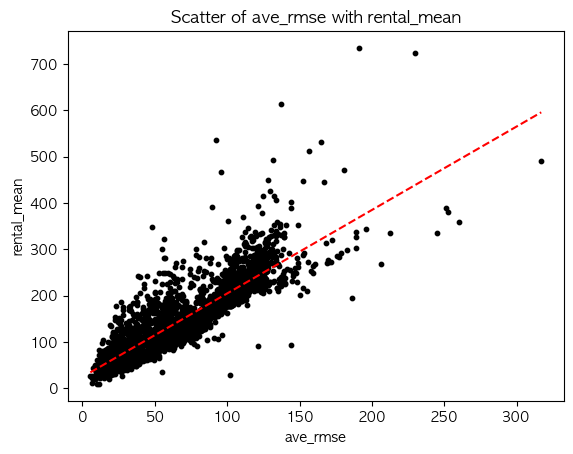

Correlation score : 0.851017940050293


In [150]:
ave_rmse_values = final_df3['ave_rmse']
rental_mean_values = final_df3['rental_mean']

# 선형 회귀 계산
coefficients = np.polyfit(ave_rmse_values, rental_mean_values, 1)
polynomial = np.poly1d(coefficients)

# 추세선 데이터 생성
line_x = np.linspace(ave_rmse_values.min(), ave_rmse_values.max(), 100)
line_y = polynomial(line_x)

plt.scatter(final_df3['ave_rmse'], final_df3['rental_mean'], s=10, c='black')

# 추세선 그리기
plt.plot(line_x, line_y, color='red', linestyle='--', label='추세선')

# plt.yscale('log')

# 그래프에 라벨 등 추가
plt.xlabel('ave_rmse')
plt.ylabel('rental_mean')
plt.title('Scatter of ave_rmse with rental_mean')

plt.show()

# 상관 계수 계산
correlation_matrix = final_df3[['ave_rmse','rental_mean']].corr()

# 특정 두 열 간의 상관 계수
correlation_score = correlation_matrix.loc['ave_rmse', 'rental_mean']

print(f"Correlation score : {correlation_score}")

### 버스정류장 분석

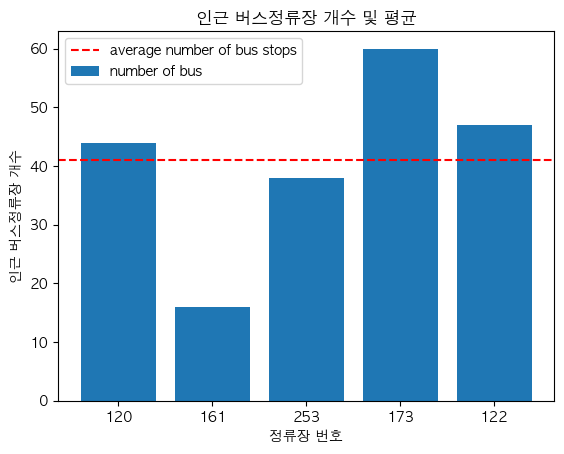

In [115]:
# size
# plt.figure(figsize=(40,10))

# 한글 폰트 설정 (맥북의 경우)
rc('font', family='AppleGothic')

plt.bar(bottom_top5['station_number'], bottom_top5['인근 버스정류장 개수'], label='number of bus')

# 평균계산
bottom_ave_bus = bottom_top5['인근 버스정류장 개수'].mean()
plt.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='average number of bus stops')

# 그림에 라벨 등 추가
plt.xlabel('정류장 번호')
plt.ylabel('인근 버스정류장 개수')
plt.title('인근 버스정류장 개수 및 평균')
plt.legend()  # 평균에 대한 범례 추가
plt.show()

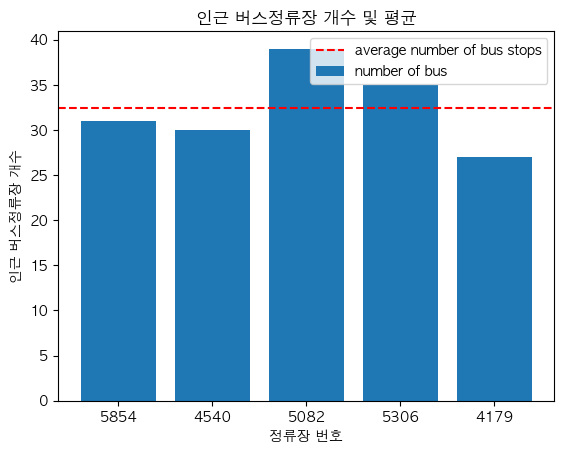

In [116]:
plt.bar(top_top5['station_number'], top_top5['인근 버스정류장 개수'], label='number of bus')

# 평균계산
bottom_ave_bus = top_top5['인근 버스정류장 개수'].mean()
plt.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='average number of bus stops')

# 그림에 라벨 등 추가
plt.xlabel('정류장 번호')
plt.ylabel('인근 버스정류장 개수')
plt.title('인근 버스정류장 개수 및 평균')
plt.legend()  # 평균에 대한 범례 추가
plt.show()

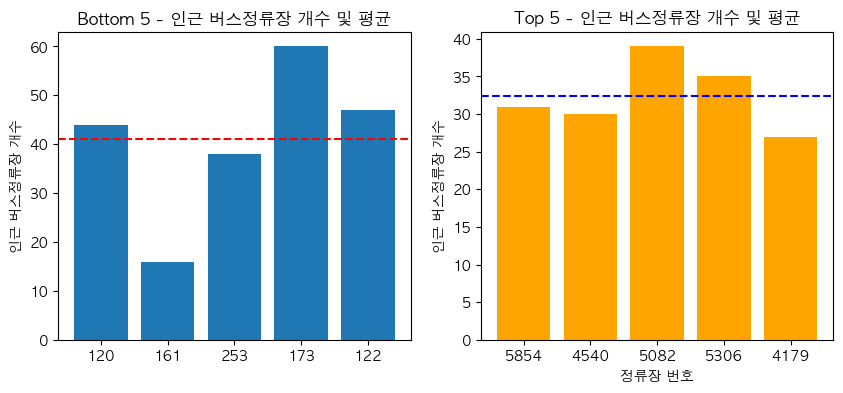

In [126]:
# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# 첫 번째 그림 그리기
ax1.bar(bottom_top5['station_number'], bottom_top5['인근 버스정류장 개수'], label='Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['인근 버스정류장 개수'].mean()
ax1.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Average Bus Stops')

# 두 번째 그림 그리기
ax2.bar(top_top5['station_number'], top_top5['인근 버스정류장 개수'], label='Number of Bus Stops', color='orange')

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['인근 버스정류장 개수'].mean()
ax2.axhline(y=top_ave_bus, color='b', linestyle='--', label='Average Bus Stops')

# 그림에 라벨 등 추가
ax2.set_xlabel('정류장 번호')
ax1.set_ylabel('인근 버스정류장 개수')
ax2.set_ylabel('인근 버스정류장 개수')
ax1.set_title('Bottom 5 - 인근 버스정류장 개수 및 평균')
ax2.set_title('Top 5 - 인근 버스정류장 개수 및 평균')
# ax1.legend()  # 첫 번째 그림의 범례 추가
# ax2.legend()  # 두 번째 그림의 범례 추가

# 그림 표시
plt.show()

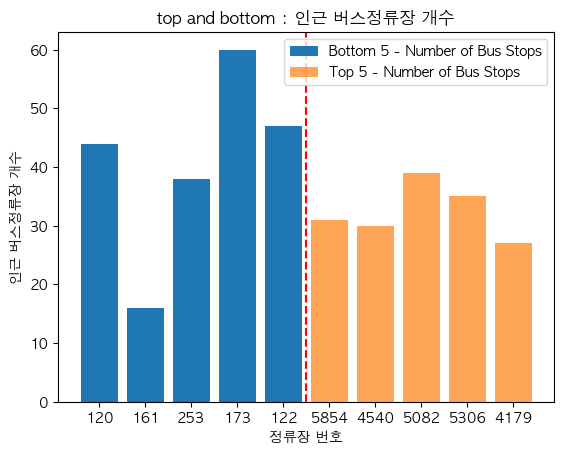

In [164]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['인근 버스정류장 개수'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['인근 버스정류장 개수'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['인근 버스정류장 개수'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['인근 버스정류장 개수'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('인근 버스정류장 개수')
ax.set_title('top and bottom : 인근 버스정류장 개수')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

### 지하철역 개수 분석

In [130]:
bottom_top5.columns

Index(['station_number', 'ave_rmse', 'lat', 'lon', '인근 버스정류장 개수', '인근 지하철역 개수',
       '인근 학교 수', '인근 아파트 세대수', '(A)비분리형 겸용도로', '(A)자전거 전용도로', '(A)분리형 겸용도로',
       '(A)자전거 전용차로', '(B)자전거 전용도로', '(B)분리형 겸용도로', '(A)자전거 우선도로',
       'rental_mean'],
      dtype='object')

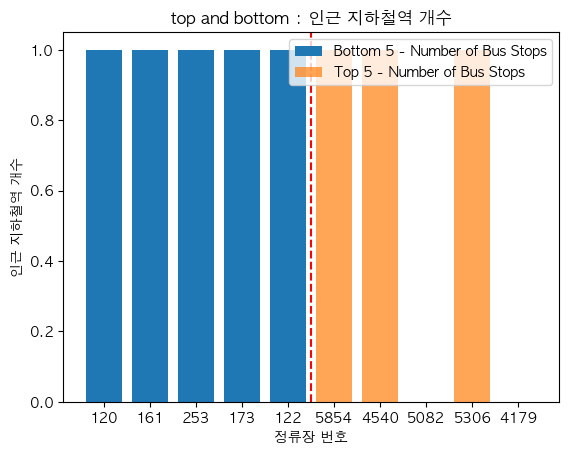

In [136]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['인근 지하철역 개수'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['인근 지하철역 개수'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['인근 지하철역 개수'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['인근 지하철역 개수'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('인근 지하철역 개수')
ax.set_title('top and bottom : 인근 지하철역 개수')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

### 학교분석

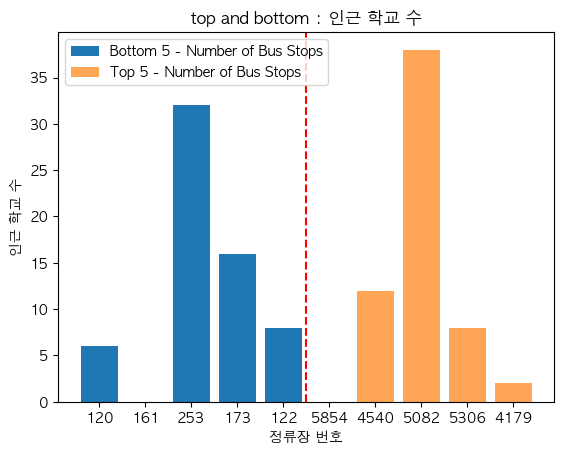

In [137]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['인근 학교 수'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['인근 학교 수'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['인근 학교 수'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['인근 학교 수'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('인근 학교 수')
ax.set_title('top and bottom : 인근 학교 수')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

### 인근 아파트 세대수

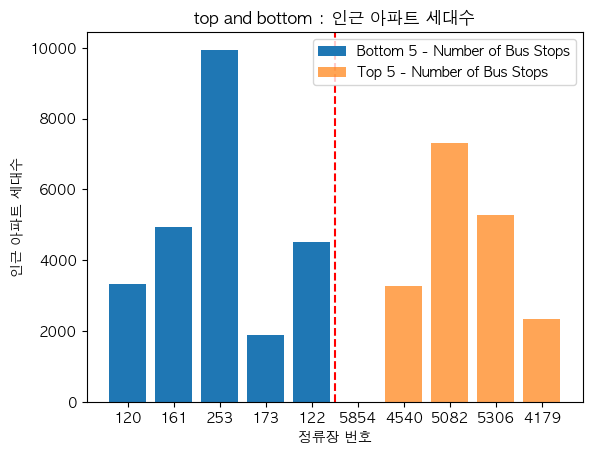

In [138]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['인근 아파트 세대수'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['인근 아파트 세대수'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['인근 아파트 세대수'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['인근 아파트 세대수'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('인근 아파트 세대수')
ax.set_title('top and bottom : 인근 아파트 세대수')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

### (A)비분리형 겸용도로

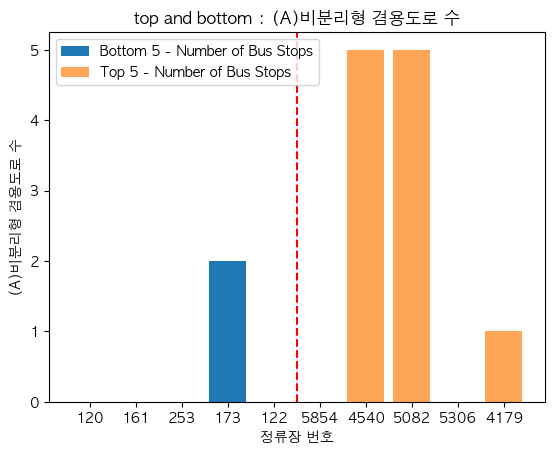

In [139]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['(A)비분리형 겸용도로'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['(A)비분리형 겸용도로'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['(A)비분리형 겸용도로'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['(A)비분리형 겸용도로'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('(A)비분리형 겸용도로 수')
ax.set_title('top and bottom : (A)비분리형 겸용도로 수')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

In [140]:
bottom_top5.columns

Index(['station_number', 'ave_rmse', 'lat', 'lon', '인근 버스정류장 개수', '인근 지하철역 개수',
       '인근 학교 수', '인근 아파트 세대수', '(A)비분리형 겸용도로', '(A)자전거 전용도로', '(A)분리형 겸용도로',
       '(A)자전거 전용차로', '(B)자전거 전용도로', '(B)분리형 겸용도로', '(A)자전거 우선도로',
       'rental_mean'],
      dtype='object')

### (A)자전거 전용도로

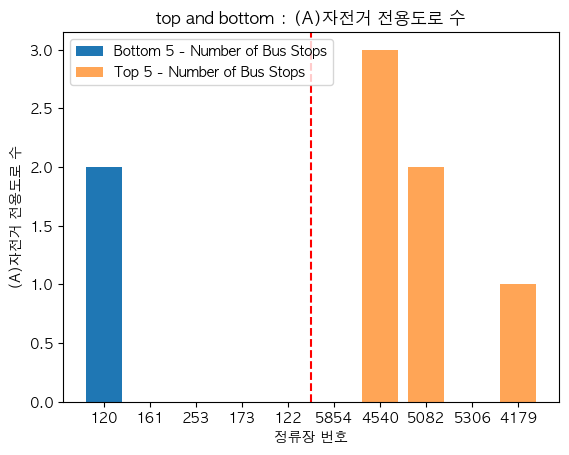

In [141]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['(A)자전거 전용도로'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['(A)자전거 전용도로'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['(A)자전거 전용도로'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['(A)자전거 전용도로'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('(A)자전거 전용도로 수')
ax.set_title('top and bottom : (A)자전거 전용도로 수')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

### (A)분리형 겸용도로

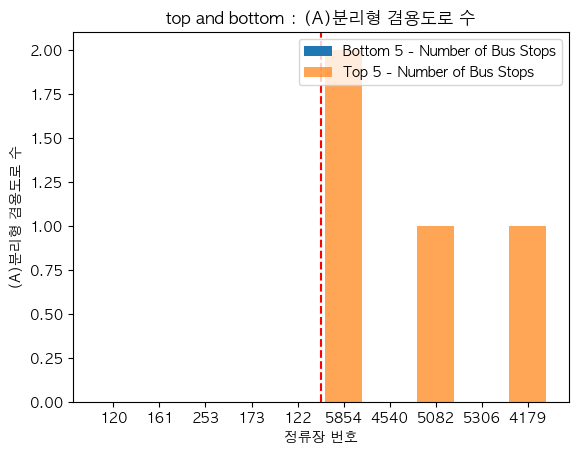

In [143]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['(A)분리형 겸용도로'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['(A)분리형 겸용도로'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['(A)분리형 겸용도로'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['(A)분리형 겸용도로'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('(A)분리형 겸용도로 수')
ax.set_title('top and bottom : (A)분리형 겸용도로 수')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

### (A)자전거 전용차로

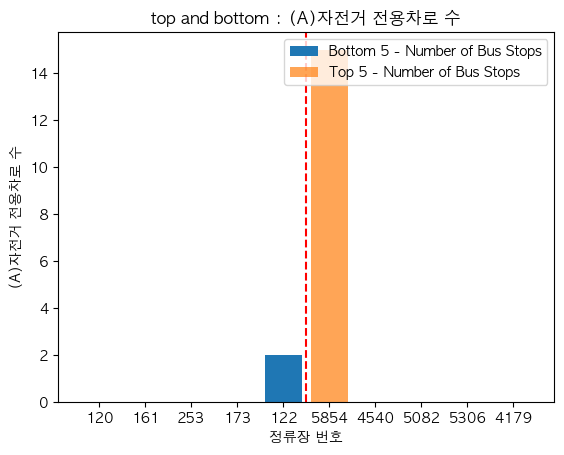

In [144]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['(A)자전거 전용차로'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['(A)자전거 전용차로'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['(A)자전거 전용차로'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['(A)자전거 전용차로'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('(A)자전거 전용차로 수')
ax.set_title('top and bottom : (A)자전거 전용차로 수')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

### (B)자전거 전용도로

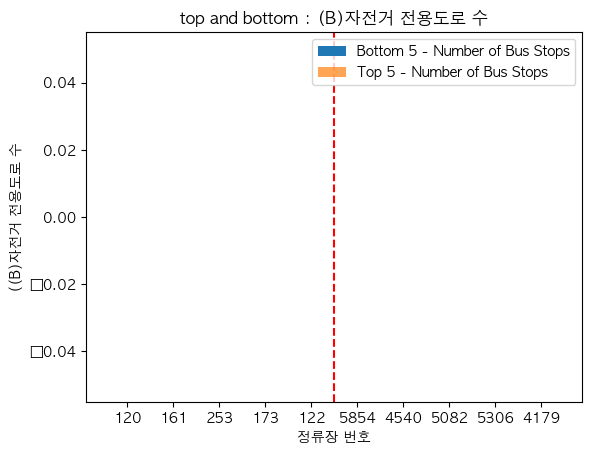

In [146]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['(B)자전거 전용도로'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['(B)자전거 전용도로'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['(B)자전거 전용도로'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['(B)자전거 전용도로'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('((B)자전거 전용도로 수')
ax.set_title('top and bottom : (B)자전거 전용도로 수')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

### (B)분리형 겸용도로

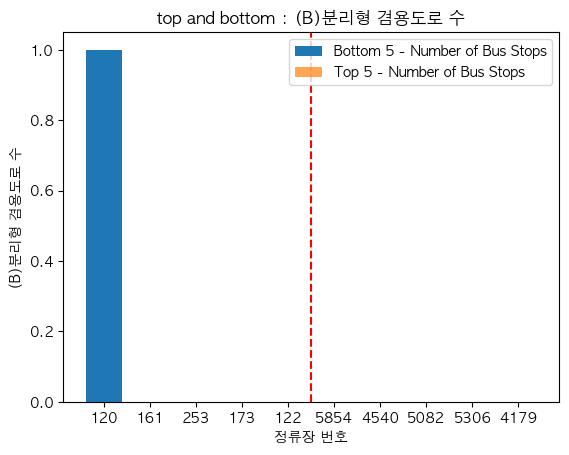

In [147]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['(B)분리형 겸용도로'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['(B)분리형 겸용도로'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['(B)분리형 겸용도로'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['(B)분리형 겸용도로'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('(B)분리형 겸용도로 수')
ax.set_title('top and bottom : (B)분리형 겸용도로 수')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

### (A)자전거 우선도로

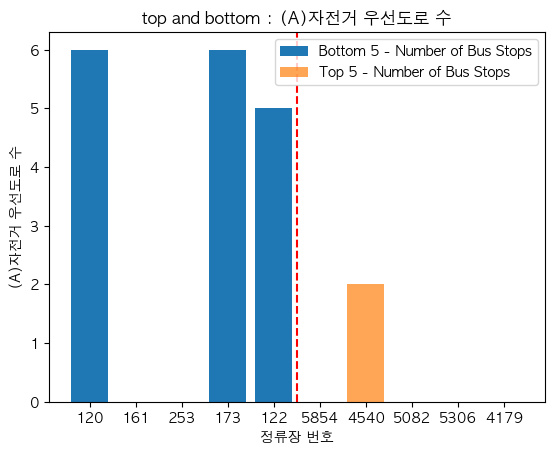

In [148]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['(A)자전거 우선도로'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['(A)자전거 우선도로'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['(A)자전거 우선도로'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['(A)자전거 우선도로'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('(A)자전거 우선도로 수')
ax.set_title('top and bottom : (A)자전거 우선도로 수')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

### 자전거도로 총합

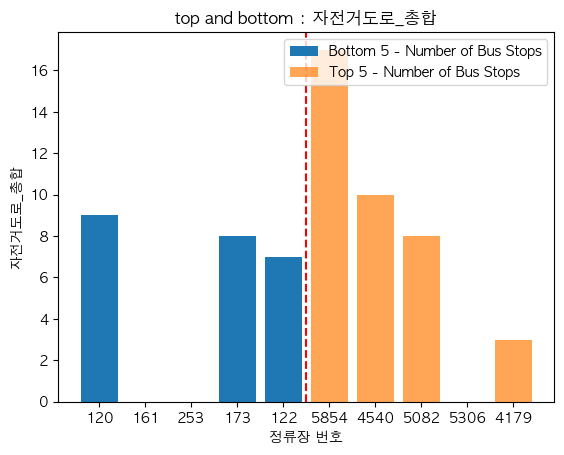

In [169]:
# 서브플롯 생성
fig, ax = plt.subplots()

# 첫 번째 그림 그리기
ax.bar(bottom_top5['station_number'], bottom_top5['자전거도로_총합'], label='Bottom 5 - Number of Bus Stops')

# 첫 번째 그림의 평균선 그리기
bottom_ave_bus = bottom_top5['자전거도로_총합'].mean()
# ax.axhline(y=bottom_ave_bus, color='r', linestyle='--', label='Bottom 5 - Average Bus Stops')

# 두 번째 그림 그리기
ax.bar(top_top5['station_number'], top_top5['자전거도로_총합'], label='Top 5 - Number of Bus Stops', alpha=0.7)

# 두 번째 그림의 평균선 그리기
top_ave_bus = top_top5['자전거도로_총합'].mean()
# ax.axhline(y=top_ave_bus, color='b', linestyle='--', label='Top 5 - Average Bus Stops')

# 가운데에 x축에 수직으로 점선 그리기
ax.axvline(x=len(bottom_top5) - 0.5, color='r', linestyle='--')

# 그림에 라벨 등 추가
ax.set_xlabel('정류장 번호')
ax.set_ylabel('자전거도로_총합')
ax.set_title('top and bottom : 자전거도로_총합')
ax.legend()  # 범례 추가

# 그림 표시
plt.show()

# 지도상에서 분석 : folium

In [227]:
top_top5 # 제일 못맞추는

,station_number,ave_rmse,lat,lon,인근 버스정류장 개수,인근 지하철역 개수,인근 학교 수,인근 아파트 세대수,(A)비분리형 겸용도로,(A)자전거 전용도로,(A)분리형 겸용도로,(A)자전거 전용차로,(B)자전거 전용도로,(B)분리형 겸용도로,(A)자전거 우선도로,rental_mean,자전거도로_총합
2700,5854,317.032531,37.525089,126.924080,31,1,0,0,0,0,2,15,0,0,0,490.652174,17
2421,4540,260.200407,37.526531,126.864456,30,1,12,3257,5,3,0,0,0,0,2,359.043478,10
2660,5082,252.459017,37.560196,126.854912,39,0,38,7305,5,2,1,0,0,0,0,379.260870,8
2671,5306,251.122439,37.627861,127.076378,35,1,8,5273,0,0,0,0,0,0,0,388.043478,0
2266,4179,245.170750,37.493080,126.923836,27,0,2,2350,1,1,1,0,0,0,0,334.739130,3


In [228]:
bottom_top5 # 제일 잘 맞추는

,station_number,ave_rmse,lat,lon,인근 버스정류장 개수,인근 지하철역 개수,인근 학교 수,인근 아파트 세대수,(A)비분리형 겸용도로,(A)자전거 전용도로,(A)분리형 겸용도로,(A)자전거 전용차로,(B)자전거 전용도로,(B)분리형 겸용도로,(A)자전거 우선도로,rental_mean,자전거도로_총합
16,120,5.456213,37.545242,126.934113,44,1,6,3320,0,2,0,0,0,1,6,25.913043,9
51,161,6.342626,37.582245,126.950645,16,1,0,4945,0,0,0,0,0,0,0,22.652174,0
130,253,6.560957,37.500648,126.909515,38,1,32,9944,0,0,0,0,0,0,0,11.000000,0
61,173,6.634455,37.564777,126.966148,60,1,16,1872,2,0,0,0,0,0,6,26.782609,8
18,122,7.275310,37.547459,126.938377,47,1,8,4518,0,0,0,2,0,0,5,43.869565,7


In [229]:
top_top5_filter = top_top5.loc[:,"station_number":"lon"]
top_top5_filter = top_top5_filter[['station_number','lat','lon','ave_rmse']]

bottom_top5_filter = bottom_top5.loc[:,"station_number":"lon"]
bottom_top5_filter = bottom_top5_filter[['station_number','lat','lon','ave_rmse']]

In [232]:
# 지도의 중심 위치 설정
map_center = [37.5665, 126.9780]

# folium 지도 생성
total_rmse_map = folium.Map(location=map_center, zoom_start=12)

# HeatMap 데이터 생성
top_heat_data = [[row['lat'], row['lon'], row['ave_rmse']] for index, row in top_top5_filter.iterrows()]
bottom_heat_data = [[row['lat'], row['lon'], row['ave_rmse']] for index, row in bottom_top5_filter.iterrows()]

# HeatMap 추가
HeatMap(top_heat_data, gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}, radius=15, blur=10).add_to(total_rmse_map)
HeatMap(bottom_heat_data, gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}, radius=15, blur=10).add_to(total_rmse_map)

for index, row in top_top5_filter.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Station: {row['station_number']}\nAverage RMSE: {row['ave_rmse']:.2f}",
        icon=folium.Icon(color='red')
    ).add_to(total_rmse_map)

for index, row in bottom_top5_filter.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Station: {row['station_number']}\nAverage RMSE: {row['ave_rmse']:.2f}",
        icon=folium.Icon(color='blue')
    ).add_to(total_rmse_map)

# 지도를 HTML 파일로 저장
total_rmse_map.save('heatmap.html')

total_rmse_map

In [222]:
top_heat_data

[[37.52508926, 126.9240799, 317.03253063948256],
 [37.52653122, 126.8644562, 260.20040677941364],
 [37.56019592, 126.8549118, 252.459017318228],
 [37.62786102, 127.0763779, 251.12243909421176],
 [37.49308014, 126.9238358, 245.17075024480405]]

## 대여량 전체에 대한 Heatmap

In [233]:
# 지도의 중심 좌표 설정
map_center = [37.5665, 126.9780]

# folium 지도 객체 생성
rental_map = folium.Map(location=map_center, zoom_start=13)

# HeatMap 레이어를 추가합니다.
heat_data = [[row['lat'], row['lon'], row['rental_mean']] for index, row in final_df3.iterrows()]
HeatMap(heat_data, radius=15).add_to(rental_map)
# rental_map.save("heatmap_with_radius-2.html")
rental_map

In [234]:
# 지도의 중심 좌표 설정
map_center = [37.5665, 126.9780]

# folium 지도 객체 생성
RMSE_map = folium.Map(location=map_center, zoom_start=13)

# HeatMap 레이어를 추가합니다.
heat_data = [[row['lat'], row['lon'], row['ave_rmse']] for index, row in final_df3.iterrows()]
HeatMap(heat_data, radius=15).add_to(RMSE_map)
# rental_map.save("heatmap_with_radius-2.html")
RMSE_map

In [237]:
## ave_rmse / rental_ave

# 지도의 중심 좌표 설정
map_center = [37.5665, 126.9780]

# folium 지도 객체 생성
rental_rmse_map = folium.Map(location=map_center, zoom_start=13)

# HeatMap 레이어를 추가합니다.
heat_data = [[row['lat'], row['lon'], row['ave_rmse']/row['rental_mean']] for index, row in final_df3.iterrows()]
HeatMap(heat_data, radius=15).add_to(rental_rmse_map)
# rental_map.save("heatmap_with_radius-2.html")
rental_rmse_map

rental_rmse_map.save("Final_heatmap.html")

In [238]:
bottom_top5.columns

Index(['station_number', 'ave_rmse', 'lat', 'lon', '인근 버스정류장 개수', '인근 지하철역 개수',
       '인근 학교 수', '인근 아파트 세대수', '(A)비분리형 겸용도로', '(A)자전거 전용도로', '(A)분리형 겸용도로',
       '(A)자전거 전용차로', '(B)자전거 전용도로', '(B)분리형 겸용도로', '(A)자전거 우선도로',
       'rental_mean', '자전거도로_총합'],
      dtype='object')

In [ ]:
bycycle_info_path = '/Users/joseph/git/DS_Capstone/Sample_Model/Data' + '/자전거대여소.csv'
spatial_features_path = '/Users/joseph/git/DS_Capstone/Sample_Model/Data' + '/Final_feature_df.csv'
rmse_path =  '/Users/joseph/git/DS_Capstone/Sample_Model/Data' + '/loss_test_by_station-2.csv'

# 데이터 불러오기
bycycle_info_df = pd.read_csv(bycycle_info_path, encoding='utf-8-sig')
spatial_df = pd.read_csv(spatial_features_path, encoding='euc-kr', index_col=0)
rmse_df = pd.read_csv(rmse_path,  index_col=0)

In [ ]:
# RMSE 값을 소수점 첫째자리까지 구하기
rmse_df = rmse_df.round(1)
rmse_df

### 대여소별 상위 n개, 하위 n개 test set별로 RMSE 시각화

In [ ]:
## 모든 대여소 정보
# 자전거대여소별 9월 평균 계산(소수점 1째자리) 및 오름차순
row_means = rmse_df.mean(axis=1).round(1).sort_values()

# 자전거대여소별 일별 평균 계산(소수점 1째자리) 및 내림차순 
column_means = rmse_df.mean(axis=0).round(1).sort_values(ascending=False)

# 정렬된 출력
print("자전거 대여소별 9월 평균:\n", row_means)
print("\n일별 전체 대여소의 평균:\n", column_means)

In [ ]:
#### 상위, 하위 몇% 만 볼것인지 정하기
ratio = 0.05

# 상위 5% 추출
top_n_rows = row_means.head(int(len(row_means) * ratio))
top_n_columns = column_means.tail(int(len(column_means) * ratio))

# 하위 5% 추출
bottom_n_rows = row_means.tail(int(len(row_means) * ratio)).sort_values(ascending=False)
bottom_n_columns = column_means.head(int(len(column_means) * ratio))

# 결과 출력
print("상위", ratio*100,"% 대여소:\n", top_n_rows)
print("\n하위", ratio*100,"% 대여소:\n", bottom_n_rows)
print("\n상위", ratio*100,"% 날짜:\n", top_n_columns)
print("\n하위", ratio*100,"% 날짜:\n", bottom_n_columns)

In [ ]:
# rmse_df 데이터프레임의 모든 값 중 최대값과 최소값 찾기
max_value = rmse_df.max().max()
min_value = rmse_df.min().min()

print("최대값:", max_value)
print("최소값:", min_value)

In [ ]:
df_path = '/Users/joseph/git/DS_Capstone/Sample_Model/Data'  + '/adj_original_231209.pkl'
df = pd.read_pickle(df_path)

In [ ]:
# RMSE 기준으로 노드 분류  
top_stations = top_n_rows.index
bottom_stations = bottom_n_rows.index

In [ ]:
## 3~9월까지 데이터 확인하기
bycycle_year_path = '/Users/joseph/git/DS_Capstone/Sample_Model/Data' + '/weekday_re_df_1021.pkl'
bycycle_year_df = pd.read_pickle(bycycle_year_path)

# bycycle_year_df의 열 이름을 날짜 형식으로 변환
bycycle_year_df.columns = pd.to_datetime(bycycle_year_df.columns)

bycycle_year_df

In [ ]:
# 2022년 3월 1일 이상 및 9월 1일 이전의 열 이름 필터링
filtered_columns = bycycle_year_df.columns[(bycycle_year_df.columns >= pd.Timestamp('2022-03-01')) & (bycycle_year_df.columns < pd.Timestamp('2022-09-01'))]
filtered_df = bycycle_year_df[filtered_columns]

# top_stations에 속한 2728 대여소 필터링 
top_stations_case = [2728]  
top_filtered_df = filtered_df.loc[top_stations_case]

# top_stations에 속한 2747 대여소 필터링 
bottom_stations_case = [2747] 
bottom_filtered_df = filtered_df.loc[bottom_stations_case]

# 상위 Top5, 하위 Top5 필터링 
top_stations_case = top_stations[:5]
top_case_filtered_df = filtered_df.loc[top_stations_case]

bottom_stations_case = bottom_stations[:5]
bottom_case_filtered_df = filtered_df.loc[bottom_stations_case]

In [ ]:
# 열 이름을 '월' 형식으로 변환
# top_filtered_df.columns = top_filtered_df.columns.strftime('%m')
# bottom_filtered_df.columns = bottom_filtered_df.columns.strftime('%m')

# 박스플롯 그리기
plt.figure(figsize=(12, 6))

# Top Stations Boxplot
plt.subplot(1, 2, 1)
top_filtered_df.boxplot()
plt.title('Boxplot for Top Stations')
plt.ylabel('Rental Count')
# plt.xticks(range(1, len(top_filtered_df.columns) + 1), top_filtered_df.columns)

# Bottom Stations Boxplot
plt.subplot(1, 2, 2)
bottom_filtered_df.boxplot()
plt.title('Boxplot for Bottom Stations')
plt.ylabel('Rental Count')
# plt.xticks(range(1, len(bottom_filtered_df.columns) + 1), bottom_filtered_df.columns)

plt.show()

In [ ]:
# 박스플롯 그리기
fig, axes = plt.subplots(2, 5, figsize=(15, 10))  # 2행 5열의 서브플롯 생성

# Top Stations Boxplot
for i, station in enumerate(top_stations_case):
    top_case_filtered_df.loc[station].plot(kind='box', ax=axes[0, i])
    axes[0, i].set_title(f'Boxplot for Station {station}')
    axes[0, i].set_ylabel('Rental Count')

# Bottom Stations Boxplot
for i, station in enumerate(bottom_stations_case):
    bottom_case_filtered_df.loc[station].plot(kind='box', ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot for Station {station}')
    axes[1, i].set_ylabel('Rental Count')

plt.tight_layout()  # 레이아웃 조정
plt.show()
